# LAB 6 - TEXT ANALYTICS / INTRO TO NATURAL LANGUAGE PROCESSING

In [1]:
import os
import pandas as pd
fname = 'tweets.csv'
# fname = os.path.join(DATA_DIR, fname)
tweets = pd.read_csv(fname)

tweets.head(10)

# import csv
# fname = 'tweets.csv'
# # fname = os.path.join(DATA_DIR, fname)
# tweets = []
# #with open(fname) as f:
# import codecs
# with codecs.open(fname, "r", encoding='utf-8', errors='ignore') as f: ##for special encoding issues  
#     reader = csv.reader(f)
#     tweets = list(reader)
# tweets[:10]

,Tweet,Avg
0,"IMO, @apple's new #iphone 5S/C was meant to co...",0.0
1,RT @SWAGGA_L: THE WORST ! RT @Mati_uCurvegawd...,-0.8
2,@mog_sharif @Apples @Android @Microsoft @Apple...,0.0
3,I hope the 5s battery life is better than the ...,-1.0
4,@DeltaAssist *EP it gets worse. The notificati...,-1.2
5,@Apple #iOS7..Everybody get ready to experienc...,1.0
6,Could @Apple & @PayPal announcements be game c...,0.0
7,"@apple, thank you so much for making all the i...",-1.0
8,@battalalgoos @apple,-0.2
9,@apple let iphones use gifs as wallpapers,0.0


In [2]:
tweets.info()
tweets.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1181 entries, 0 to 1180
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Tweet   1181 non-null   object 
 1   Avg     1181 non-null   float64
dtypes: float64(1), object(1)
memory usage: 18.6+ KB


,Avg
count,1181.000000
mean,-0.193057
std,0.676421
min,-2.000000
25%,-0.600000
50%,0.000000
75%,0.200000
max,2.000000


In [3]:
# most_frequent_tweet = pd.DataFrame(tweets.describe()).loc['top'][0]
# tweets[tweets['Tweet'] == most_frequent_tweet]['Tweet']

In [4]:
# We want to predict negative sentiment
# Lets create a new variable called "Negative" that converts the 
# "sentiment" number to negative (or not negative)
# anything less than or equal to -1 is negative
 
tweets['Negative'] = (tweets['Avg'] <= -1).astype('int32').astype('object')

# And remove the old "Avg" column - we won't use it anymore

tweets.drop(columns=['Avg'], inplace=True)
tweets.head()

,Tweet,Negative
0,"IMO, @apple's new #iphone 5S/C was meant to co...",0
1,RT @SWAGGA_L: THE WORST ! RT @Mati_uCurvegawd...,0
2,@mog_sharif @Apples @Android @Microsoft @Apple...,0
3,I hope the 5s battery life is better than the ...,1
4,@DeltaAssist *EP it gets worse. The notificati...,1


0    999
1    182
Name: Negative, dtype: int64


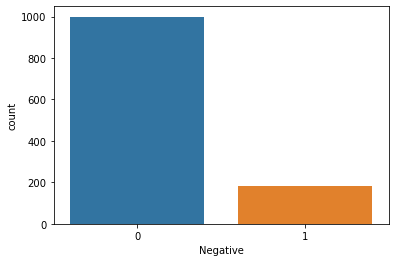

In [120]:
# Before going any further, lets understand the rough distribution of
# negative tweets in our data set
import seaborn as sns

sns.countplot(tweets['Negative'], order=tweets['Negative'].value_counts().index);
print(tweets['Negative'].value_counts())

## Cleaning Text

In [45]:
text = tweets['Tweet']
text

0       IMO, @apple's new #iphone 5S/C was meant to co...
1       RT @SWAGGA_L: THE WORST !  RT @Mati_uCurvegawd...
2       @mog_sharif @Apples @Android @Microsoft @Apple...
3       I hope the 5s battery life is better than the ...
4       @DeltaAssist *EP it gets worse. The notificati...
                              ...                        
1176    Why does @windowsphone and @Android constantly...
1177    Dear @Apple - I'm a little peeved at y'all not...
1178    {#IPODPLAYERPROMO #IPOD #IPAD #ITUNES #APPLE #...
1179                        @xfrancesjoanna @crocs @apple
1180    @mediacat Ortada algilari etkileyecek ucuz bir...
Name: Tweet, Length: 1181, dtype: object

### Change to Lowercase

In [79]:
# Step 2: Change all the text to lower case.
# tm_map applies an operation to every document in our corpus
# Here, that operation is 'tolower', i.e., 'to lowercase'
text_lowercase = text.str.lower()
text_lowercase

0       imo, @apple's new #iphone 5s/c was meant to co...
1       rt @swagga_l: the worst !  rt @mati_ucurvegawd...
2       @mog_sharif @apples @android @microsoft @apple...
3       i hope the 5s battery life is better than the ...
4       @deltaassist *ep it gets worse. the notificati...
                              ...                        
1176    why does @windowsphone and @android constantly...
1177    dear @apple - i'm a little peeved at y'all not...
1178    {#ipodplayerpromo #ipod #ipad #itunes #apple #...
1179                        @xfrancesjoanna @crocs @apple
1180    @mediacat ortada algilari etkileyecek ucuz bir...
Name: Tweet, Length: 1181, dtype: object

In [80]:
# OR use the apply method to apply a function to all the rows of the dataframe:
text_lowercase = text.apply(str.lower)
text_lowercase

0       imo, @apple's new #iphone 5s/c was meant to co...
1       rt @swagga_l: the worst !  rt @mati_ucurvegawd...
2       @mog_sharif @apples @android @microsoft @apple...
3       i hope the 5s battery life is better than the ...
4       @deltaassist *ep it gets worse. the notificati...
                              ...                        
1176    why does @windowsphone and @android constantly...
1177    dear @apple - i'm a little peeved at y'all not...
1178    {#ipodplayerpromo #ipod #ipad #itunes #apple #...
1179                        @xfrancesjoanna @crocs @apple
1180    @mediacat ortada algilari etkileyecek ucuz bir...
Name: Tweet, Length: 1181, dtype: object

### Remove Punctuation

In [81]:
from string import punctuation

def remove_punctuation(document):
    no_punct = ''.join([character for character in document if character not in punctuation])
    return no_punct

In [82]:
text_no_punct = lowercase_text.apply(remove_punctuation)
text_no_punct

0       imo apples new iphone 5sc was meant to confuse...
1       rt swaggal the worst   rt matiucurvegawd yooo ...
2       mogsharif apples android microsoft apple thats...
3       i hope the 5s battery life is better than the ...
4       deltaassist ep it gets worse the notification ...
                              ...                        
1176    why does windowsphone and android constantly t...
1177    dear apple  im a little peeved at yall not doi...
1178    ipodplayerpromo ipod ipad itunes apple promo i...
1179                           xfrancesjoanna crocs apple
1180    mediacat ortada algilari etkileyecek ucuz bir ...
Name: Tweet, Length: 1181, dtype: object

### Tokenization

In [83]:
from nltk.tokenize import word_tokenize
tokens = text_no_punct.apply(word_tokenize)
tokens.head()

0    [imo, apples, new, iphone, 5sc, was, meant, to...
1    [rt, swaggal, the, worst, rt, matiucurvegawd, ...
2    [mogsharif, apples, android, microsoft, apple,...
3    [i, hope, the, 5s, battery, life, is, better, ...
4    [deltaassist, ep, it, gets, worse, the, notifi...
Name: Tweet, dtype: object

### Remove Stopwords

In [84]:
from nltk.corpus import stopwords

# First, take a look at tm's stopwords:
stop_words = set(stopwords.words('english'))
stop_words

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [156]:
# We want to remove stopwords and "apple", as this is a word common to all of our tweets
stop_words.add('apple')

In [100]:
def remove_stopwords(document):
    words = [word for word in document if not word in stop_words]
    return words

In [101]:
text_no_stop = tokens.apply(remove_stopwords)
text_no_stop

0       [imo, apples, new, iphone, 5sc, meant, confuse...
1       [rt, swaggal, worst, rt, matiucurvegawd, yooo,...
2       [mogsharif, apples, android, microsoft, thats,...
3       [hope, 5s, battery, life, better, 5, day, isnt...
4       [deltaassist, ep, gets, worse, notification, r...
                              ...                        
1176    [windowsphone, android, constantly, try, compe...
1177    [dear, im, little, peeved, yall, 5c, preorders...
1178    [ipodplayerpromo, ipod, ipad, itunes, promo, i...
1179                              [xfrancesjoanna, crocs]
1180    [mediacat, ortada, algilari, etkileyecek, ucuz...
Name: Tweet, Length: 1181, dtype: object

### Stemming/Lemmatization

In [102]:
from nltk.stem import PorterStemmer
porter = PorterStemmer()

def stemmer(document):
    stemmed_document = [porter.stem(word) for word in document]
    return stemmed_document

In [111]:
text_stemmed = text_no_stop.apply(stemmer)
text_stemmed

0       [imo, appl, new, iphon, 5sc, meant, confus, ru...
1       [rt, swaggal, worst, rt, matiucurvegawd, yooo,...
2       [mogsharif, appl, android, microsoft, that, ve...
3       [hope, 5s, batteri, life, better, 5, day, isnt...
4       [deltaassist, ep, get, wors, notif, remain, ev...
                              ...                        
1176    [windowsphon, android, constantli, tri, compet...
1177    [dear, im, littl, peev, yall, 5c, preorder, ai...
1178    [ipodplayerpromo, ipod, ipad, itun, promo, ipo...
1179                               [xfrancesjoanna, croc]
1180    [mediacat, ortada, algilari, etkileyecek, ucuz...
Name: Tweet, Length: 1181, dtype: object

In [128]:
# Seems we didn't catch all of the apples...
text_stemmed = text_stemmed.apply(lambda document: [word for word in document if not word == 'appl'])
text_stemmed

0       [imo, new, iphon, 5sc, meant, confus, russian,...
1       [rt, swaggal, worst, rt, matiucurvegawd, yooo,...
2        [mogsharif, android, microsoft, that, veryright]
3       [hope, 5s, batteri, life, better, 5, day, isnt...
4       [deltaassist, ep, get, wors, notif, remain, ev...
                              ...                        
1176    [windowsphon, android, constantli, tri, compet...
1177    [dear, im, littl, peev, yall, 5c, preorder, ai...
1178    [ipodplayerpromo, ipod, ipad, itun, promo, ipo...
1179                               [xfrancesjoanna, croc]
1180    [mediacat, ortada, algilari, etkileyecek, ucuz...
Name: Tweet, Length: 1181, dtype: object

### Tokenization

In [146]:
###

### Detokenization

Mention why detokenization. sklearn package inputs

In [152]:
from nltk.tokenize.treebank import TreebankWordDetokenizer

text_detokenized = text_stemmed.apply(TreebankWordDetokenizer().detokenize)
text_detokenized

0           imo new iphon 5sc meant confus russian market
1       rt swaggal worst rt matiucurvegawd yooo iphon ...
2              mogsharif android microsoft that veryright
3       hope 5s batteri life better 5 day isnt even ha...
4       deltaassist ep get wors notif remain even app ...
                              ...                        
1176    windowsphon android constantli tri compet leve...
1177    dear im littl peev yall 5c preorder aint stand...
1178    ipodplayerpromo ipod ipad itun promo ipodplaye...
1179                                  xfrancesjoanna croc
1180    mediacat ortada algilari etkileyecek ucuz bir ...
Name: Tweet, Length: 1181, dtype: object

## Document-Term Matrix
DTM does tokenization for us

In [154]:
text_clean = text_detokenized

In [167]:
# Step 6: Create a word count matrix (rows are tweets, columns are words)
# We've finished our basic cleaning, so now we want to calculate frequencies
# of words across the tweets
from sklearn.feature_extraction.text import CountVectorizer

countvec = CountVectorizer()
sparse_dtm = countvec.fit_transform(text_clean)
sparse_dtm

<1181x3433 sparse matrix of type '<class 'numpy.int64'>'
	with 9465 stored elements in Compressed Sparse Row format>

This format is called Compressed Sparse Format. It save a lot of memory to store the dtm in this format, but it is difficult to look at for a human. To illustrate the techniques in this lesson we will first convert this matrix back to a Pandas DataFrame, a format we're more familiar with. For larger datasets, you will have to use the Compressed Sparse Format. Putting it into a DataFrame, however, will enable us to get more comfortable with Pandas!

In [163]:
dtm = pd.DataFrame(sparse_dtm.toarray(), columns=countvec.get_feature_names(), index=tweets.index)
dtm

,000,075,0909,0910,099,10,100,100m,1085,10min,...,youtub,youv,yu,yurbud,z10,ze,zifmstereo,zimmerman,zippo,zostac
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1176,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1177,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1178,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1179,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


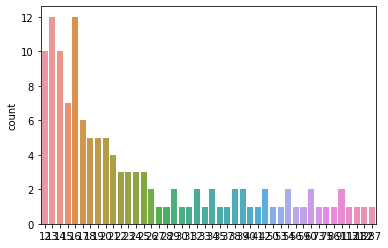

In [294]:
frequencies = dtm.sum().sort_values(ascending=False)
sns.countplot(frequencies)

In [185]:
# Step 7: Account for sparsity
# We currently have way too many words, which will make it hard to train
# our models and may even lead to overfitting.
# Use findFreqTerms to get a feeling for which words appear the most

# Words that appear at least 50 times:
print(frequencies[frequencies > 50])

iphon              287
itun               121
new                113
5s                  91
ipad                91
phone               86
get                 75
ipod                73
make                60
ipodplayerpromo     60
5c                  59
freak               56
im                  54
app                 54
like                53
dtype: int64


In [ ]:
#  [1] "iphon"           "new"             "app"             "get"             "make"           
#  [6] "freak"           "just"            "dont"            "will"            "itun"           
# [11] "phone"           "like"            "ipad"            "ipod"            "ipodplayerpromo"

In [200]:
cumfr = [sum(frequencies[:i+1]) for i in range(len(frequencies))]

In [ ]:
sns.countplot(cumfr)

In [201]:
percentile = [100*i/cumfr[-1] for i in cumfr]

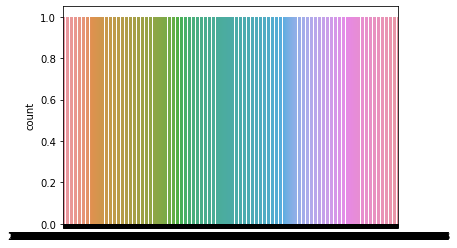

In [202]:
sns.countplot(percentile)

In [204]:
# Our solution to the possibility of overfitting is to only keep terms
# that appear in x% or more of the tweets. 

# For example, 1% of the tweets or more (= 12 or more)
countvec2 = CountVectorizer(min_df=12)
sparse_dtm2 = countvec2.fit_transform(text_clean)
dtm2 = pd.DataFrame(sparse_dtm2.toarray(), columns=countvec2.get_feature_names(), index=tweets.index)
dtm2.sum().sort_values(ascending=False)

iphon    287
itun     121
new      113
5s        91
ipad      91
        ... 
best      12
wish      12
steve     12
siri      12
didnt     12
Length: 127, dtype: int64

In [206]:
# 0.5% of the tweets or more (= 6 or more)
countvec3 = CountVectorizer(min_df=6)
sparse_dtm3 = countvec3.fit_transform(text_clean)
dtm3 = pd.DataFrame(sparse_dtm3.toarray(), columns=countvec3.get_feature_names(), index=tweets.index)
# How many did we keep?
dtm3.sum().sort_values(ascending=False)

iphon     287
itun      121
new       113
5s         91
ipad       91
         ... 
talk        6
condom      6
lock        6
lost        6
20          6
Length: 331, dtype: int64

In [229]:
# Let's keep it at the 1%
dtm = dtm2.join(tweets['Negative'], how='outer')
dtm

,5c,5s,android,announc,anyon,app,back,batteri,best,better,...,wish,wont,work,would,wtf,yall,year,yet,your,Negative
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,2,0,1,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1176,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1177,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
1178,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1179,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# We have some variable names that start with a number, 
# which can cause R some problems. Let's fix this before going
# any further
colnames(TweetsTM) = make.names(colnames(TweetsTM))
# This isn't our original dataframe, so we need to bring that column
# with the dependent variable into this new one
TweetsTM$Negative = Tweets$Negative

## -------------------------------------------------------------------------------------------------------

## Supervised Learning

In [300]:
from sklearn.model_selection import train_test_split

y = dtm['Negative'].astype('int32')
X = dtm.drop(['Negative'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=88)
X_train.shape, X_test.shape

((826, 127), (355, 127))

In [301]:
# Baseline accuracy
print(y_train.value_counts())
print(y_test.value_counts())

0    699
1    127
Name: Negative, dtype: int64
0    300
1     55
Name: Negative, dtype: int64


In [303]:
print('ACC', 300/(300 + 55))

ACC 0.8450704225352113


### Random Forest Classifier

In [306]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=500, random_state=88)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=500, random_state=88)

In [307]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

y_pred = rf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print ("Confusion Matrix: \n", cm)
print ("\nAccuracy:", accuracy_score(y_test, y_pred))

Confusion Matrix: 
 [[282  18]
 [ 34  21]]

Accuracy: 0.8535211267605634


### Decision Tree Classifier with CV

In [308]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

grid_values = {'ccp_alpha': np.linspace(0, 0.1, 101)}

dtc = DecisionTreeClassifier(random_state=88)
dtc_cv = GridSearchCV(dtc, param_grid=grid_values, cv=10)
dtc_cv.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=88),
             param_grid={'ccp_alpha': array([0.   , 0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008,
       0.009, 0.01 , 0.011, 0.012, 0.013, 0.014, 0.015, 0.016, 0.017,
       0.018, 0.019, 0.02 , 0.021, 0.022, 0.023, 0.024, 0.025, 0.026,
       0.027, 0.028, 0.029, 0.03 , 0.031, 0.032, 0.033, 0.034, 0.035,
       0.036, 0.037, 0.038, 0.039, 0.04 , 0.041, 0.042, 0.043, 0.044,
       0.045, 0.046, 0.047, 0.048, 0.049, 0.05 , 0.051, 0.052, 0.053,
       0.054, 0.055, 0.056, 0.057, 0.058, 0.059, 0.06 , 0.061, 0.062,
       0.063, 0.064, 0.065, 0.066, 0.067, 0.068, 0.069, 0.07 , 0.071,
       0.072, 0.073, 0.074, 0.075, 0.076, 0.077, 0.078, 0.079, 0.08 ,
       0.081, 0.082, 0.083, 0.084, 0.085, 0.086, 0.087, 0.088, 0.089,
       0.09 , 0.091, 0.092, 0.093, 0.094, 0.095, 0.096, 0.097, 0.098,
       0.099, 0.1  ])})

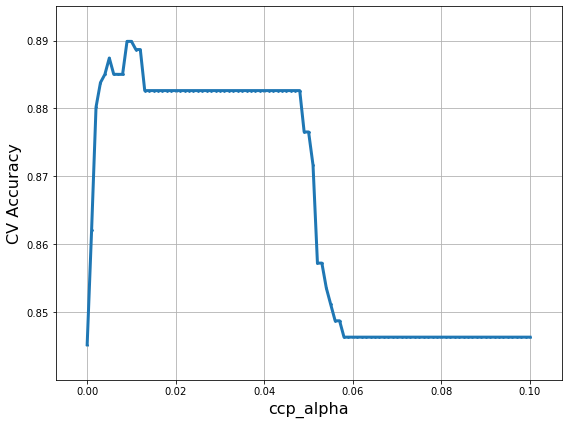

Best ccp_alpha {'ccp_alpha': 0.009000000000000001}


In [309]:
import matplotlib.pyplot as plt

ccp_alpha = dtc_cv.cv_results_['param_ccp_alpha'].data
ACC_scores = dtc_cv.cv_results_['mean_test_score']

plt.figure(figsize=(8, 6))
plt.xlabel('ccp_alpha', fontsize=16)
plt.ylabel('CV Accuracy', fontsize=16)
plt.scatter(ccp_alpha, ACC_scores, s=3)
plt.plot(ccp_alpha, ACC_scores, linewidth=3)
plt.grid(True, which='both')
# plt.xlim([0, 0.00055])
# plt.ylim([0.2, 0.5])

plt.tight_layout()
plt.show()

print('Best ccp_alpha', dtc_cv.best_params_)

Node count = 5


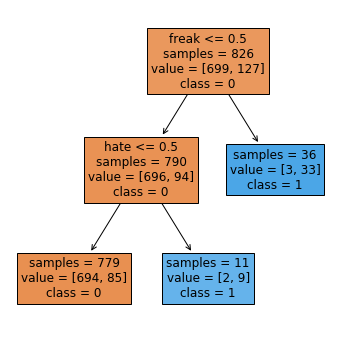

In [310]:
from sklearn.tree import plot_tree

print('Node count =', dtc_cv.best_estimator_.tree_.node_count)
plt.figure(figsize=(6,6))
plot_tree(dtc_cv.best_estimator_, 
          feature_names=X_train.columns, 
          class_names=['0','1'], 
          filled=True,
          impurity=False,
          fontsize=12) 
plt.show()

In [311]:
y_pred = dtc_cv.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print ("Confusion Matrix: \n", cm)
print ("\nAccuracy:", accuracy_score(y_test, y_pred))

Confusion Matrix: 
 [[295   5]
 [ 38  17]]

Accuracy: 0.8788732394366198


In [ ]:
# Cross-validated CART model
set.seed(3421)
train.cart = train(Negative ~ .,
                   data = TweetsTrain,
                   method = "rpart",
                   tuneGrid = data.frame(cp=seq(0, 0.4, 0.002)),
                   trControl = trainControl(method="cv", number=10))
train.cart
train.cart$results

ggplot(train.cart$results, aes(x = cp, y = Accuracy)) + 
  geom_point(size = 2) + 
  geom_line() + 
  ylab("CV Accuracy") + 
  theme_bw() + 
  theme(axis.title=element_text(size=18), axis.text=element_text(size=18))

mod.cart = train.cart$finalModel
prp(mod.cart)

predict.cart = predict(mod.cart, newdata = TweetsTest, type = "class") # why no model.matrix? 
table(TweetsTest$Negative, predict.cart)
tableAccuracy(TweetsTest$Negative, predict.cart)

In [ ]:
# Cross validated RF
# WARNING: this took me approx. 1 hour to run
set.seed(311)
train.rf = train(Negative ~ .,
                 data = TweetsTrain,
                 method = "rf",
                 tuneGrid = data.frame(mtry = 1:120),
                 trControl = trainControl(method = "cv", number = 5, verboseIter = TRUE))
train.rf
train.rf$results

ggplot(train.rf$results, aes(x = mtry, y = Accuracy)) + geom_point(size = 2) + geom_line() + 
  ylab("CV Accuracy") + theme_bw() + 
  theme(axis.title=element_text(size=18), axis.text=element_text(size=18))


mod.rf = train.rf$finalModel
predict.rf = predict(mod.rf, newdata = TweetsTest)
table(TweetsTest$Negative, predict.rf)
tableAccuracy(TweetsTest$Negative, predict.rf)

# Variable importance using dplyr and the pipe
# Step 1: turn mod.rf$importance into a data frame
# Step 2: create a new variable (column) called Words equal to the rownames of mod.rf$importance
# Step 3: arrange in descendending order according to variable importance measure
as.data.frame(mod.rf$importance) %>%
  mutate(Words = rownames(mod.rf$importance)) %>%
  arrange(desc(MeanDecreaseGini))


# Logistic Regression

TweetLog = glm(Negative ~ ., data = TweetsTrain, family = "binomial")
# You may see a warning message - suspicious, but we will just ignore this
summary(TweetLog)

# Predictions on test set
PredictLog = predict(TweetLog, newdata = TweetsTest, type = "response")
table(TweetsTest$Negative, PredictLog > 0.5)
tableAccuracy(TweetsTest$Negative, PredictLog > 0.5)
# Not as good as CART or RF

# But what about training set?
PredictLogTrain = predict(TweetLog, type = "response")
table(TweetsTrain$Negative, PredictLogTrain > 0.5)
tableAccuracy(TweetsTrain$Negative, PredictLogTrain > 0.5)

# What about CART on training set?
PredictCARTTrain = predict(mod.cart, type = "class")
table(TweetsTrain$Negative, PredictCARTTrain)
tableAccuracy(TweetsTrain$Negative, PredictCARTTrain)
# Quite similar to test set performance


# Let's do stepwise regression
# WARNING: this took ~20 mins
TweetStepLog = step(TweetLog, direction = "backward")
summary(TweetStepLog)
length(TweetStepLog$coefficients)
# may want to manually prune beyond this point...

PredictStepLog = predict(TweetStepLog, newdata = TweetsTest, type = "response")
table(TweetsTest$Negative, PredictStepLog > 0.5)
tableAccuracy(TweetsTest$Negative, PredictStepLog > 0.5)


# Boosting
tGrid = expand.grid(n.trees = (1:100)*50, interaction.depth = c(1,2,4,6,8,10,12,14,16),
                    shrinkage = 0.01, n.minobsinnode = 10)

set.seed(232)
# WARNING: this took me ~1 hour
train.boost <- train(Negative ~ .,
                     data = TweetsTrain,
                     method = "gbm",
                     tuneGrid = tGrid,
                     trControl = trainControl(method="cv", number=5, verboseIter = TRUE),
                     metric = "Accuracy",
                     distribution = "bernoulli")
train.boost
train.boost$results

ggplot(train.boost$results, aes(x = n.trees, y = Accuracy, colour = as.factor(interaction.depth))) + geom_line() + 
  ylab("CV Accuracy") + theme_bw() + theme(axis.title=element_text(size=18), axis.text=element_text(size=18)) + 
  scale_color_discrete(name = "interaction.depth")

mod.boost = train.boost$finalModel

TweetsTest.mm = as.data.frame(model.matrix(Negative ~ . +0, data = TweetsTest))
predict.boost = predict(mod.boost, newdata = TweetsTest.mm, n.trees = 4100, type = "response")
table(TweetsTest$Negative, predict.boost < 0.5) # for some reason the probabilities are flipped in gbm
tableAccuracy(TweetsTest$Negative, predict.boost < 0.5)


# Linear Discriminant Analysis
# Normally distributed features?
library(MASS)
lda.mod = lda(Negative ~ ., data = TweetsTrain)

predict.lda = predict(lda.mod, newdata = TweetsTest)$class
table(TweetsTest$Negative, predict.lda)
tableAccuracy(TweetsTest$Negative, predict.lda)
